In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objects as go
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from scipy.stats import skew, kurtosis


In [ ]:
# import all the methods and functions from all the modules:
from src.data_ingestion import *
from src.data_preprocessing import *
from src.univariate_analysis import *
from src.feature_engineering import *
from src.model_building import *

In [ ]:
# initiating the IngestData class. 
ingest = IngestData()
df = ingest.get_data("C:\\Users\\DELL\\Downloads\\ModularProjects\\AmesHousing\\data\\AmesHousing.csv")

#### BASIC DATA EXPLORATION:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [5]:
df.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [6]:
df.shape

(2930, 82)

In [5]:
df.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [22]:
df['Sale Type'].unique()

array(['WD ', 'New', 'COD', 'ConLI', 'Con', 'ConLD', 'Oth', 'ConLw',
       'CWD', 'VWD'], dtype=object)

In [6]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [8]:
# finding missing value columns:
missing_cols = find_missing_value_cols(df)
print(f"The number of missing columns are : {len(missing_cols)}")
print(missing_cols)


The number of missing columns are : 27
Lot Frontage       490
Alley             2732
Mas Vnr Type      1775
Mas Vnr Area        23
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual        159
Garage Cond        159
Pool QC           2917
Fence             2358
Misc Feature      2824
dtype: int64


In [9]:
missing_cols_with_pct = find_missing_value_percentage(df)
missing_cols_with_pct

Lot Frontage  -  16.72 % missing values
Alley  -  93.24 % missing values
Mas Vnr Type  -  60.58 % missing values
Mas Vnr Area  -  0.78 % missing values
Bsmt Qual  -  2.73 % missing values
Bsmt Cond  -  2.73 % missing values
Bsmt Exposure  -  2.83 % missing values
BsmtFin Type 1  -  2.73 % missing values
BsmtFin SF 1  -  0.03 % missing values
BsmtFin Type 2  -  2.76 % missing values
BsmtFin SF 2  -  0.03 % missing values
Bsmt Unf SF  -  0.03 % missing values
Total Bsmt SF  -  0.03 % missing values
Electrical  -  0.03 % missing values
Bsmt Full Bath  -  0.07 % missing values
Bsmt Half Bath  -  0.07 % missing values
Fireplace Qu  -  48.53 % missing values
Garage Type  -  5.36 % missing values
Garage Yr Blt  -  5.43 % missing values
Garage Finish  -  5.43 % missing values
Garage Cars  -  0.03 % missing values
Garage Area  -  0.03 % missing values
Garage Qual  -  5.43 % missing values
Garage Cond  -  5.43 % missing values
Pool QC  -  99.56 % missing values
Fence  -  80.48 % missing values
M

#### Categorizing the columns as cols with high and low missing values:

In [10]:
highly_missing_cols,low_missing_cols = get_nan_cols_with_threshold(df)
print(highly_missing_cols)
print(low_missing_cols)
print(f'The number of highly missing columns are : {len(highly_missing_cols)}')
print(f'The number of low missing columns are : {len(low_missing_cols)}')


['Alley', 'Mas Vnr Type', 'Fireplace Qu', 'Pool QC', 'Fence', 'Misc Feature']
['Lot Frontage', 'Mas Vnr Area', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Electrical', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond']
The number of highly missing columns are : 6
The number of low missing columns are : 21


In [11]:
# Removing the features that has highly missing values
remove_missing_cols(df,highly_missing_cols)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,IR1,Low,AllPub,...,0,0,0,0,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,...,0,0,0,0,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2006,WD,Normal,170000


In [12]:
# Finding the duplicates
df.duplicated().any().sum()

np.int64(0)

#### Categorizing the columns into numerical and categorical:


In [13]:
# Finding the numerical columns
num_cols = find_num_cols(df)
print(f"The number of numerical columns are : {len(num_cols)}")
# num_cols

The number of numerical columns are : 39


In [14]:
# finding the categorical columns:
cat_cols = find_cat_cols(df)
print(f'The number of categorical columns are : {len(cat_cols)}')
# cat_cols

The number of categorical columns are : 37


In [15]:
# Numerical columns are of two types, Continuous and Discrete datatypes
# Separating them will help in finding out the outliers and applying encodings, the reason is
# we do some operations only to the continuous features and some on the categorical features.

discrete_cols = find_discrete_data_cols(df)
continuous_cols = find_continuous_data_cols(df)
print(f'The total number of Numerical columns are : {len(num_cols)}')
print(f'The number of of Continuous columns are : {len(continuous_cols)}')
print(f'The number of of Discrete columns are : {len(discrete_cols)}')

The total number of Numerical columns are : 39
The number of of Continuous columns are : 29
The number of of Discrete columns are : 10


In [16]:
df.shape

(2930, 76)

In [17]:
# we removed the highly null value columns so now the total number of null val cols will be different, 
nulls_after_dropping_higly_nan_cols = [i for i in df.columns if df[i].isna().sum()>0]
print("The number of null value columns after removal of highly nan value cols are : ",len(nulls_after_dropping_higly_nan_cols))

The number of null value columns after removal of highly nan value cols are :  21


In [18]:
# finding the numerical columns with nan values:
num_cols_with_nan = find_num_cols_with_nan(df)
len(num_cols_with_nan)

11

In [19]:
# finding the categorical columns with nan values:
cat_cols_with_nan = find_cat_cols_with_nan(df)
len(cat_cols_with_nan)

10

#### Univariate Analysis:

In [20]:
# Plotting the box plot of target feature to know outliers
plot_boxplot_for_target_col(df,'SalePrice')

<Figure size 500x400 with 0 Axes>

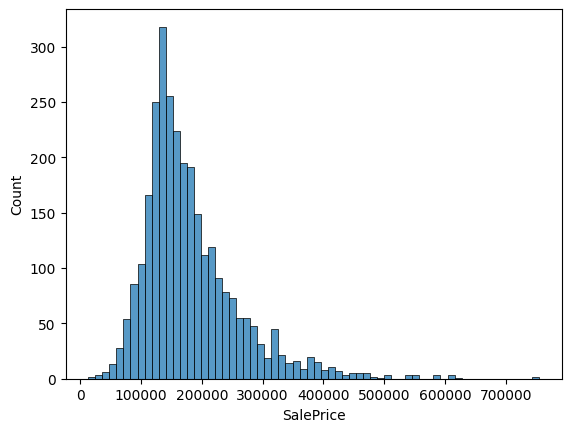

In [21]:
# Plotting the histplots for the target feature:
sns.histplot(data=df['SalePrice'])
plt.show()

In [22]:
# Plotting the box plots to find out the outiers in the features.
plot_boxplots(df,continuous_cols)

c:\Users\DELL\Downloads\ModularProjects\AmesHousing\src\univariate_analysis.py:41: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



<Figure size 500x400 with 0 Axes>

<Figure size 500x400 with 0 Axes>

<Figure size 500x400 with 0 Axes>

<Figure size 500x400 with 0 Axes>

<Figure size 500x400 with 0 Axes>

<Figure size 500x400 with 0 Axes>

<Figure size 500x400 with 0 Axes>

<Figure size 500x400 with 0 Axes>

<Figure size 500x400 with 0 Axes>

<Figure size 500x400 with 0 Axes>

<Figure size 500x400 with 0 Axes>

<Figure size 500x400 with 0 Axes>

<Figure size 500x400 with 0 Axes>

<Figure size 500x400 with 0 Axes>

<Figure size 500x400 with 0 Axes>

<Figure size 500x400 with 0 Axes>

<Figure size 500x400 with 0 Axes>

<Figure size 500x400 with 0 Axes>

<Figure size 500x400 with 0 Axes>

<Figure size 500x400 with 0 Axes>

<Figure size 500x400 with 0 Axes>

<Figure size 500x400 with 0 Axes>

<Figure size 500x400 with 0 Axes>

<Figure size 500x400 with 0 Axes>

<Figure size 500x400 with 0 Axes>

<Figure size 500x400 with 0 Axes>

<Figure size 500x400 with 0 Axes>

<Figure size 500x400 with 0 Axes>

<Figure size 500x400 with 0 Axes>

#### Observation:
There are outliers in the many features, so we have to deal with them.

#### Handling the missing values:


In [23]:
cols_to_impute_nan = get_num_cols_to_impute_nan(df)
len(cols_to_impute_nan)

11

In [24]:
num_cols_to_impute_nan = get_num_cols_to_impute_nan(df)
len(num_cols_to_impute_nan)

11

In [25]:
cat_cols_to_impute_nan = get_cat_cols_to_imute_nan(df)
len(cat_cols_to_impute_nan)

10

In [26]:
# Imputing the numerical columns with the median value of the feature
impute_num_cols(df,num_cols_to_impute_nan)

In [27]:
# Imputing the categorical columns with the mode value of the feature:
impute_cat_cols(df,cat_cols_to_impute_nan)

In [28]:
# Verifying for the null values after imputation:
[i for i in df.columns if df[i].isna().sum()>0]

[]

We can see that all the null values are imputed, so we don't have any null values in the dataset right now.

In [29]:
# Finding out the constant value columns:
constant_cols = find_constant_columns(df)
len(constant_cols) # there are no constant value columns

0

#### Handling outliers:

In [30]:
# Finding out the outlier existed columns:
# Based on the threshold values, we divide outlier cols into columns to cap and columns to remove.
outlier_cols = find_outlier_cols(df)
print('The number of outlier columns are : ',len(outlier_cols))

The number of outlier columns are :  25


In [54]:
# Get the columns with outlier percentages:
get_outlier_percentage_table = get_outlier_percentages(df)
print(get_outlier_percentage_table)

            Column  Outlier_Percentage
9   Enclosed Porch           17.480410
2     Mas Vnr Area            7.775769
0     Lot Frontage            4.641350
1         Lot Area            2.230259
8    Open Porch SF            1.989150
10       SalePrice            0.964436
3    Total Bsmt SF            0.663050
5      Gr Liv Area            0.602773
7     Wood Deck SF            0.602773
4       1st Flr SF            0.421941
6      Garage Area            0.241109


In [32]:
df.shape

(2930, 76)

In [33]:
# Remove the columns with higher percentage of outliers (threshold), here we are setting it to 20%
df = remove_columns_with_high_outliers(df,20)

No columns were removed due to high outlier percentage.


Since we do not have the columns with more than 20% of outliers in the columns, no columns were removed.

In [34]:
# Categorizing the columns to remove outliers records in the column and to cap outliers in the column.
cols_to_cap_outliers, cols_to_remove_outlier_records =categorize_outlier_cols(df,10)

In [35]:
# Columns to cap the outliers:
cols_to_cap_outliers

['BsmtFin SF 2', 'Enclosed Porch']

In [36]:
# Columns to remove the outlier records:
cols_to_remove_outlier_records

['MS SubClass',
 'Lot Frontage',
 'Lot Area',
 'Overall Qual',
 'Year Built',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'TotRms AbvGrd',
 'Garage Yr Blt',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 'SalePrice']

In [37]:
df.shape

(2930, 76)

In [38]:
# Capping the outliers:
df = cap_outliers(df)
df.shape

(2930, 76)

In [39]:
# Removing the records with outliers in the columns:
df = remove_outlier_records(df)

In [40]:
df.shape

(1659, 76)

Due to the removal of outlier records, there was almost 750 records were deleted.

In [41]:
# Verifying the outliers in the columns:
for i in continuous_cols:
    fig = go.Figure(data=[go.Box(y=df[i], boxpoints='outliers', jitter=0.3, pointpos=-1.8)]) # use processed_data[i], instead of outlier_cols[i]
    fig.update_layout(
        title = f'{i}',
        yaxis_title= f'{i}',
        width=500,
        height=400)
    fig.show()

#### Splitting the dataset:

In [42]:
X_train,X_test,y_train,y_test = split_the_data(df,'SalePrice')

In [43]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((1244, 75), (415, 75), (1244,), (415,))

In [44]:
X_train.describe(include='object')

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,...,Electrical,Kitchen Qual,Functional,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition
count,1244,1244,1244,1244,1244,1244,1244,1244,1244,1244,...,1244,1244,1244,1244,1244,1244,1244,1244,1244,1244
unique,5,2,4,4,1,5,3,24,9,5,...,5,5,6,6,3,5,5,3,10,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
freq,984,1241,818,1146,1244,936,1200,215,1069,1235,...,1131,663,1191,763,637,1168,1190,1119,1100,1045


#### Binary Encoding:

In [45]:
X_train,X_test = binary_encode_features( X_train,X_test )

In [46]:
X_train.shape, X_test.shape

((1244, 148), (415, 148))

#### Observation:
Applying Binary Encoding on the dataset resulted in adding new 73 features:
The reason why we did not use one hot encoding is, there are lot of unique labels in the features, if we apply
that then the dataset will tend to face the "Curse of Dimensionality"

In [47]:
# Finding out the null values after encoding, its good to verify the nulls, sometimes after encoding there
# are chances of getting null values:

nulls_after_encoding = X_train.isna().sum()
nulls_after_encoding[nulls_after_encoding>0]

Series([], dtype: int64)

#### Scaling: (StandardScaler)

In [48]:
X_train_scaled, X_test_scaled = scale_num_cols_using_StandardScaler(X_train, X_test)

#### Saving the X_train_scaled and X_test_scaled files:

In [49]:
X_train_scaled.to_csv('C:\\Users\\DELL\\Downloads\\ModularProjects\\AmesHousing\\data\\X_train_scaled.csv', index=False)
X_test_scaled.to_csv('C:\\Users\\DELL\\Downloads\\ModularProjects\\AmesHousing\\data\\X_test_scaled.csv', index=False)

print("Scaled datasets saved successfully!")


Scaled datasets saved successfully!


In [50]:
X_train_scaled = pd.read_csv('C:\\Users\\DELL\\Downloads\\ModularProjects\\AmesHousing\\data\\X_train_scaled.csv')
X_test_scaled = pd.read_csv('C:\\Users\\DELL\\Downloads\\ModularProjects\\AmesHousing\\data\\X_test_scaled.csv')

#### Feature Selection using Lasso Regressor:

In [51]:
X_train_scaled, X_test_scaled = select_features_lasso(X_train_scaled, X_test_scaled, y_train)

Selected features: 139
Features with coefficients shrank to zero: 7
X_train shape after feature selection: (1244, 139)
X_test shape after feature selection: (415, 139)


#### Observation:
The features in the X_train_scaled initially was 148.
Features in X_train_scaled after feature selection is 139.
Lasso Regressor removed the features/that gets shrank to zero are of 7:

### Model Building:

In [52]:
# Training the Random Forest Regressor without hyper parameter tuning:
model = apply_random_forest_regressor(X_train_scaled,y_train)

#### Model Evaluation:

In [53]:
metrics = evaluate_model_metrics(model, X_test_scaled, y_test)

MSE: 219536025.09
RMSE: 14816.75
MAE: 10733.63
R2: 0.9
Adjusted R2: 0.85
MAPE: 7.23


#### Conclusion:
The model shows a good fit with an R² of 0.9, indicating it explains 90% of the variance in the data. 

The low MSE, RMSE, and MAE values suggest strong predictive accuracy, while the MAPE of 7.23% indicates reasonably low prediction error. 

The adjusted R² of 0.85 accounts for the model's complexity, confirming it performs well despite potentially overfitting.